<a href="https://colab.research.google.com/github/endangrusiana123/SLO/blob/main/Tugas1/TugasKelompok1_20241107.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tugas 1: Multi Armed Bandit** <br>
Grup 1
1. Endang Rusiana
2. Muchammad 'Irfan Chanif Rusydi
3. Dimas Maulana

![Image Description](https://miro.medium.com/v2/resize:fit:720/format:webp/1*5q0Mihf29fftuXpKWWX2uA.png)


# Epsilon-Greedy

True Probabilities for Each Arm:
Arm 0: 0.3745
Arm 1: 0.9507
Arm 2: 0.7320
Arm 3: 0.5987
Arm 4: 0.1560
Arm 5: 0.1560
Arm 6: 0.0581
Arm 7: 0.8662
Arm 8: 0.6011
Arm 9: 0.7081


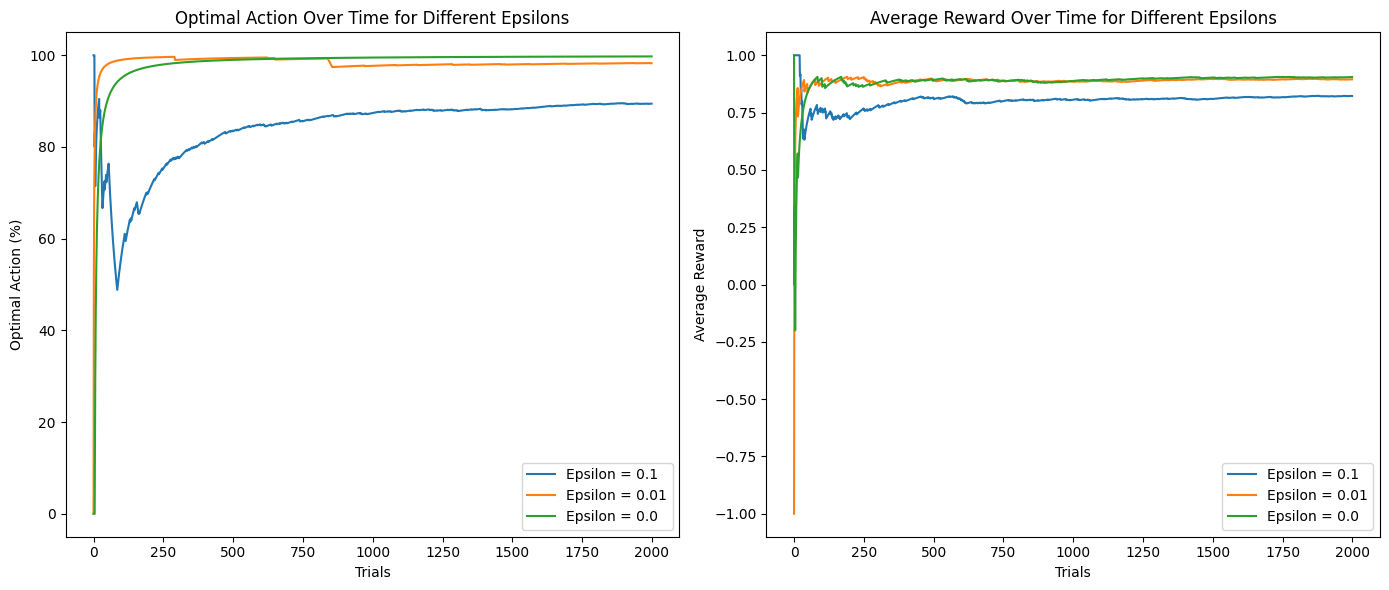

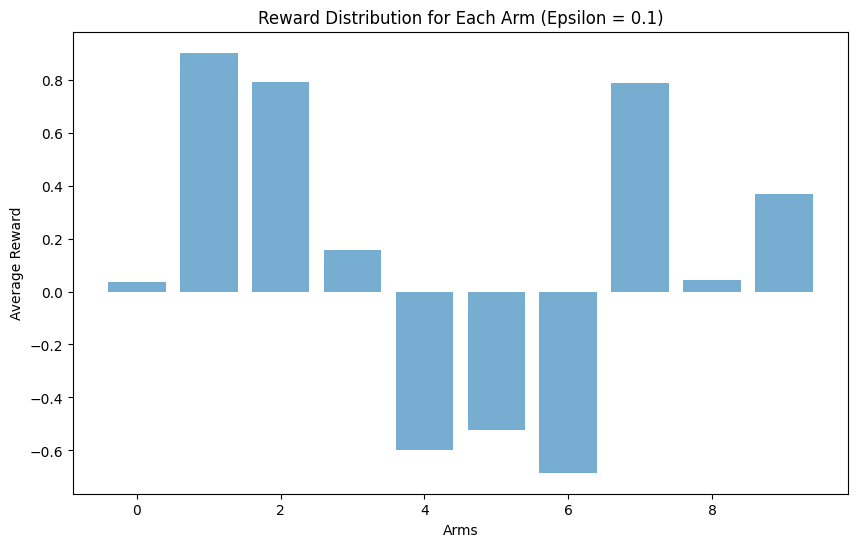

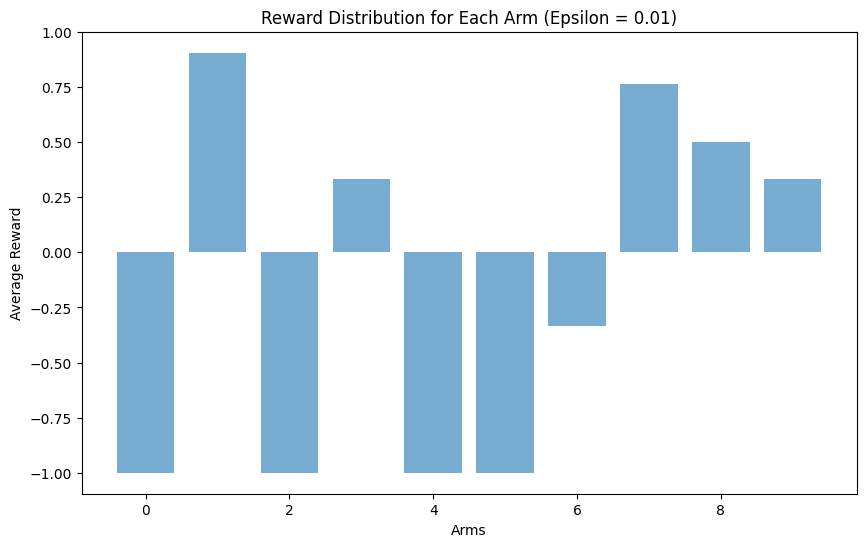

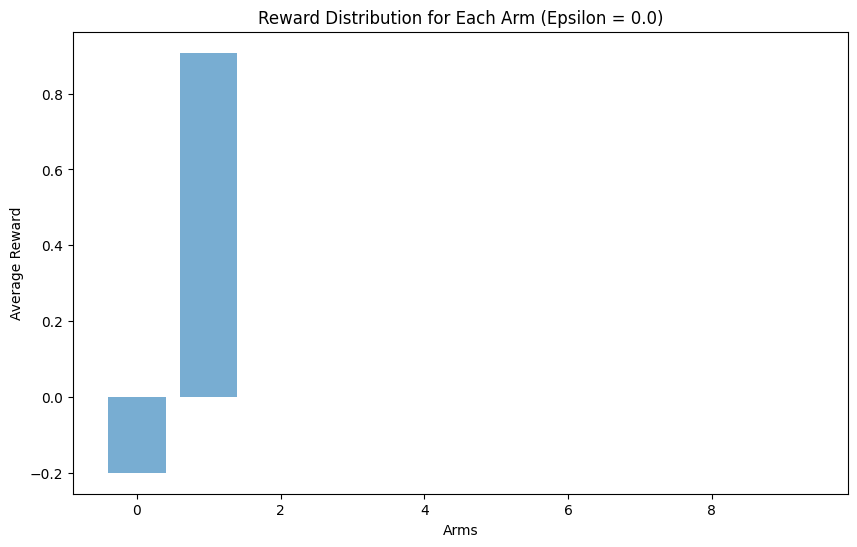

Average reward distribution for epsilon = 0.1:
Arm 0: 0.0345 average reward
Arm 1: 0.9016 average reward
Arm 2: 0.7895 average reward
Arm 3: 0.1579 average reward
Arm 4: -0.6000 average reward
Arm 5: -0.5238 average reward
Arm 6: -0.6842 average reward
Arm 7: 0.7872 average reward
Arm 8: 0.0435 average reward
Arm 9: 0.3684 average reward


Average reward distribution for epsilon = 0.01:
Arm 0: -1.0000 average reward
Arm 1: 0.9053 average reward
Arm 2: -1.0000 average reward
Arm 3: 0.3333 average reward
Arm 4: -1.0000 average reward
Arm 5: -1.0000 average reward
Arm 6: -0.3333 average reward
Arm 7: 0.7647 average reward
Arm 8: 0.5000 average reward
Arm 9: 0.3333 average reward


Average reward distribution for epsilon = 0.0:
Arm 0: -0.2000 average reward
Arm 1: 0.9078 average reward
Arm 2: 0.0000 average reward
Arm 3: 0.0000 average reward
Arm 4: 0.0000 average reward
Arm 5: 0.0000 average reward
Arm 6: 0.0000 average reward
Arm 7: 0.0000 average reward
Arm 8: 0.0000 average reward
Arm 

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Setting random seed for reproducibility
np.random.seed(42)

# Parameter setting
n_arms = 10  # number of arms
n_trials = 2000  # number of trials
epsilons = [0.1, 0.01, 0.0]  # list of epsilon values to compare

# Probabilities for each arm
true_probabilities = np.random.rand(n_arms)

# Print the true probabilities for each arm
print("True Probabilities for Each Arm:")
for arm in range(n_arms):
    print(f"Arm {arm}: {true_probabilities[arm]:.4f}")

optimal_arm = np.argmax(true_probabilities)  # arm with the highest probability

# Simulation for each epsilon value
results = {}

# Tracking reward distribution for each arm
average_reward_distribution = np.zeros((n_arms, len(epsilons)))

for idx, epsilon in enumerate(epsilons):
    # Initialize statistics for wins and trials per arm
    wins = np.zeros(n_arms)
    trials = np.zeros(n_arms)
    optimal_action_counts = np.zeros(n_trials)
    rewards = np.zeros(n_trials)

    total_reward = 0
    for t in range(n_trials):
        # Exploration with epsilon probability
        if np.random.rand() < epsilon:
            chosen_arm = np.random.randint(0, n_arms)
        else:
            # Exploitation - pick the arm with the highest average reward
            average_reward = wins / (trials + 1e-10)  # Avoid division by zero
            chosen_arm = np.argmax(average_reward)

        # Get the reward for the chosen arm
        reward = 1 if np.random.rand() < true_probabilities[chosen_arm] else -1

        # Update statistics
        wins[chosen_arm] += reward
        trials[chosen_arm] += 1
        total_reward += reward

        # Store the rewards and optimal action
        rewards[t] = total_reward
        if chosen_arm == optimal_arm:
            optimal_action_counts[t] = 1  # Count as optimal action

    # Calculate the percentage of optimal actions and average rewards
    optimal_action_percentage = np.cumsum(optimal_action_counts) / (np.arange(1, n_trials + 1)) * 100
    average_rewards = rewards / (np.arange(1, n_trials + 1))

    # Save results for each epsilon
    results[epsilon] = (optimal_action_percentage, average_rewards)

    # Calculate average reward distribution for each arm and epsilon
    for arm in range(n_arms):
        if trials[arm] > 0:
            average_reward_distribution[arm, idx] = wins[arm] / trials[arm]  # Calculate average reward

# Plotting results
plt.figure(figsize=(14, 6))

# Plot percentage of Optimal Actions
plt.subplot(1, 2, 1)
for epsilon in epsilons:
    plt.plot(results[epsilon][0], label=f"Epsilon = {epsilon}")
plt.xlabel("Trials")
plt.ylabel("Optimal Action (%)")
plt.title("Optimal Action Over Time for Different Epsilons")
plt.legend()

# Plot average reward
plt.subplot(1, 2, 2)
for epsilon in epsilons:
    plt.plot(results[epsilon][1], label=f"Epsilon = {epsilon}")
plt.xlabel("Trials")
plt.ylabel("Average Reward")
plt.title("Average Reward Over Time for Different Epsilons")
plt.legend()

plt.tight_layout()
plt.show()

# Plotting reward distribution for each arm separately for each epsilon
for idx, epsilon in enumerate(epsilons):
    plt.figure(figsize=(10, 6))
    plt.bar(np.arange(n_arms), average_reward_distribution[:, idx], alpha=0.6)
    plt.xlabel("Arms")
    plt.ylabel("Average Reward")
    plt.title(f"Reward Distribution for Each Arm (Epsilon = {epsilon})")
    plt.show()

# Display average reward distribution for each arm
for idx, epsilon in enumerate(epsilons):
    print(f"Average reward distribution for epsilon = {epsilon}:")
    for arm in range(n_arms):
        print(f"Arm {arm}: {average_reward_distribution[arm, idx]:.4f} average reward")
    print("\n")


# Upper Confidence Bound (UCB)

$$UCB(a) = \hat{Q}(a) + c \cdot \sqrt{\frac{\ln(t)}{N(a)}}$$

True Probabilities for Each Arm:
Arm 0: 0.3745
Arm 1: 0.9507
Arm 2: 0.7320
Arm 3: 0.5987
Arm 4: 0.1560
Arm 5: 0.1560
Arm 6: 0.0581
Arm 7: 0.8662
Arm 8: 0.6011
Arm 9: 0.7081


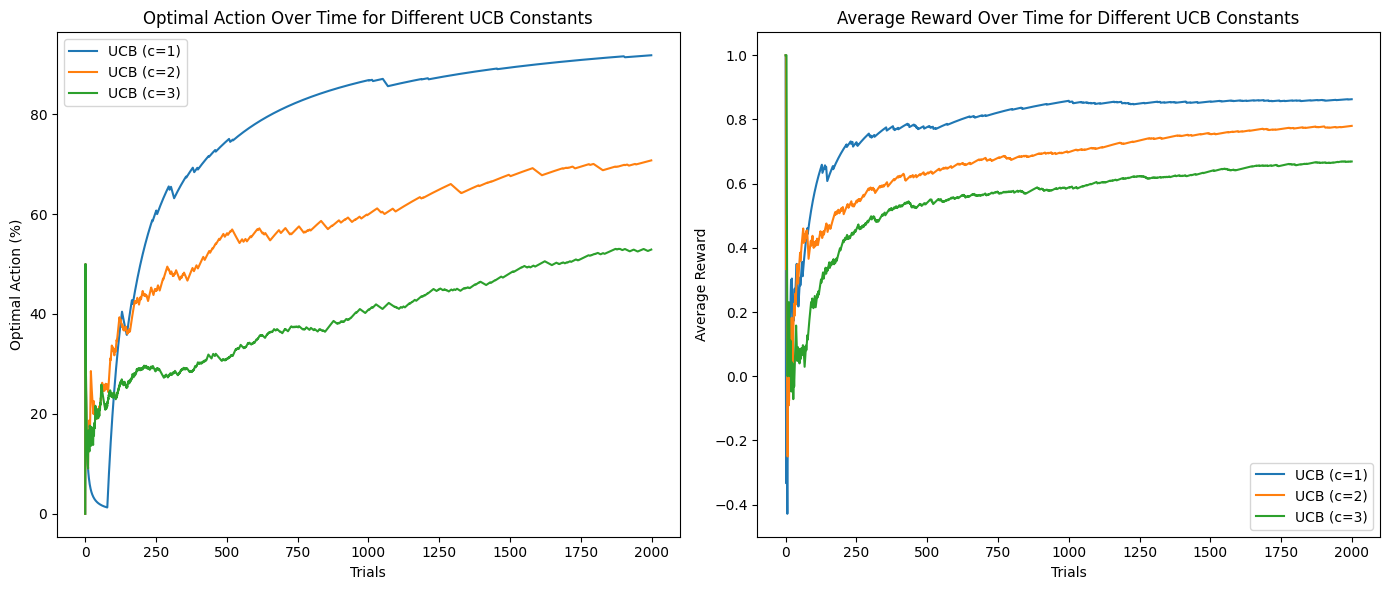

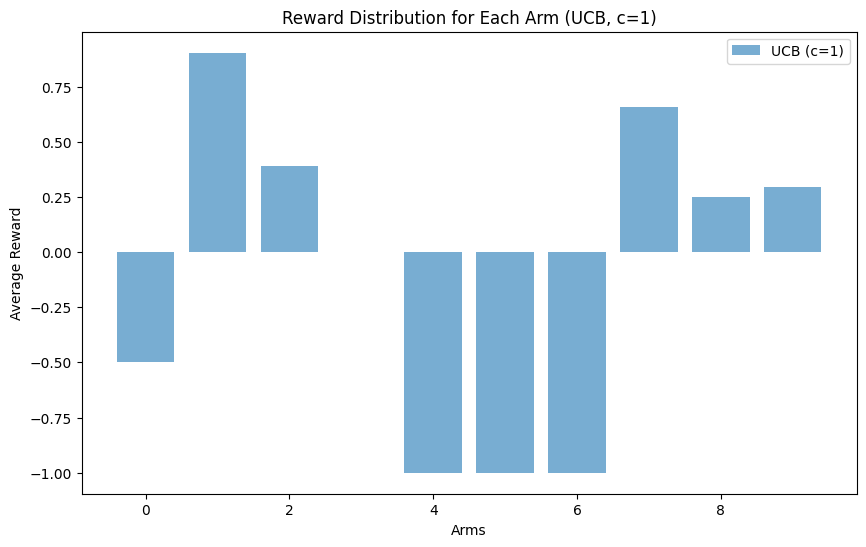

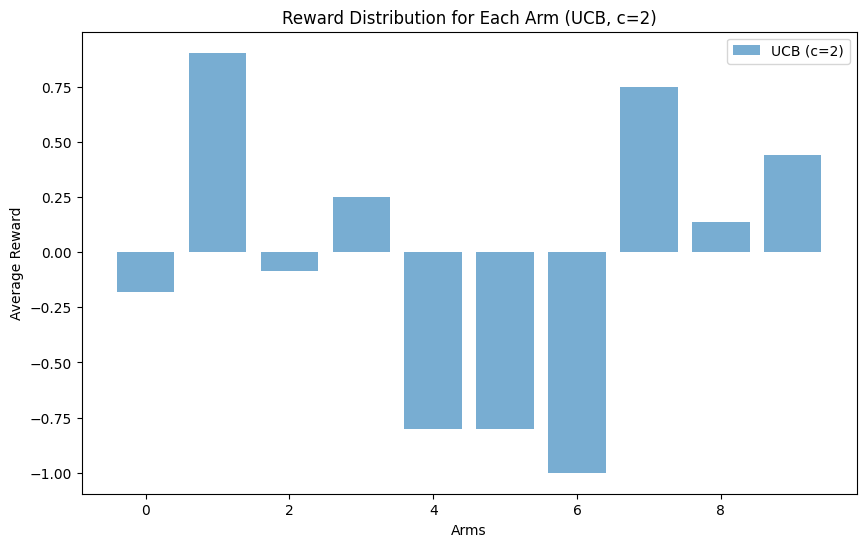

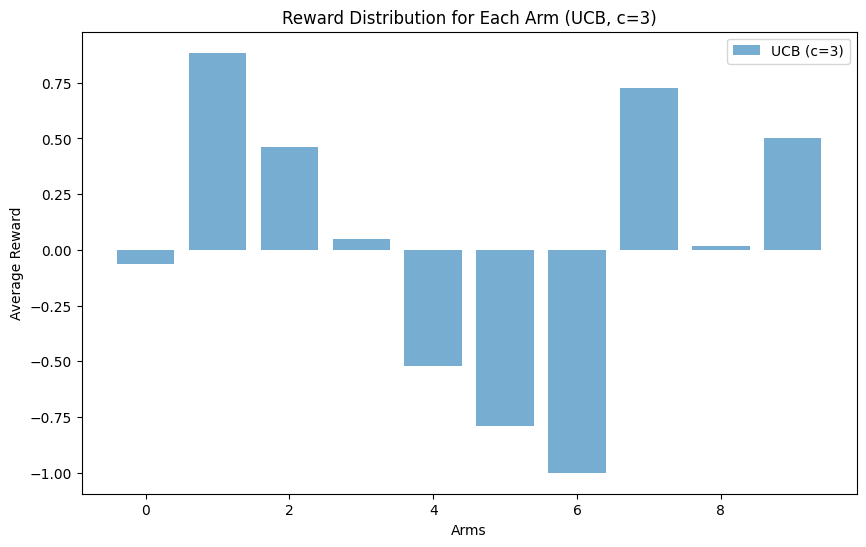

Average reward distribution for UCB (c=1):
Arm 0: -0.5000 average reward
Arm 1: 0.9031 average reward
Arm 2: 0.3913 average reward
Arm 3: 0.0000 average reward
Arm 4: -1.0000 average reward
Arm 5: -1.0000 average reward
Arm 6: -1.0000 average reward
Arm 7: 0.6591 average reward
Arm 8: 0.2500 average reward
Arm 9: 0.2941 average reward


Average reward distribution for UCB (c=2):
Arm 0: -0.1818 average reward
Arm 1: 0.9039 average reward
Arm 2: -0.0833 average reward
Arm 3: 0.2500 average reward
Arm 4: -0.8000 average reward
Arm 5: -0.8000 average reward
Arm 6: -1.0000 average reward
Arm 7: 0.7500 average reward
Arm 8: 0.1351 average reward
Arm 9: 0.4390 average reward


Average reward distribution for UCB (c=3):
Arm 0: -0.0612 average reward
Arm 1: 0.8847 average reward
Arm 2: 0.4605 average reward
Arm 3: 0.0508 average reward
Arm 4: -0.5200 average reward
Arm 5: -0.7895 average reward
Arm 6: -1.0000 average reward
Arm 7: 0.7250 average reward
Arm 8: 0.0182 average reward
Arm 9: 0.5000

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Setting random seed for reproducibility
np.random.seed(42)

# Parameter setting
n_arms = 10  # number of arms
n_trials = 2000  # number of trials
c_values = [1, 2, 3]  # Different exploration constants for UCB

# Probabilities for each arm
true_probabilities = np.random.rand(n_arms)

# Print the true probabilities for each arm
print("True Probabilities for Each Arm:")
for arm in range(n_arms):
    print(f"Arm {arm}: {true_probabilities[arm]:.4f}")

optimal_arm = np.argmax(true_probabilities)  # arm with the highest probability

# Simulation for UCB with different values of c
results = {}

# Tracking reward distribution for each arm
average_reward_distribution = np.zeros((n_arms, len(c_values)))

# Run simulation for each value of c
for c_idx, c in enumerate(c_values):
    # Initialize statistics for wins, trials per arm, and average rewards
    wins = np.zeros(n_arms)
    trials = np.zeros(n_arms)
    optimal_action_counts = np.zeros(n_trials)
    rewards = np.zeros(n_trials)

    total_reward = 0
    for t in range(1, n_trials + 1):
        # UCB - select arm based on UCB formula
        ucb_values = (wins / (trials + 1e-10)) + c * np.sqrt(np.log(t) / (trials + 1e-10))  # Avoid division by zero
        chosen_arm = np.argmax(ucb_values)

        # Get the reward for the chosen arm
        reward = 1 if np.random.rand() < true_probabilities[chosen_arm] else -1

        # Update statistics
        wins[chosen_arm] += reward
        trials[chosen_arm] += 1
        total_reward += reward

        # Store the rewards and optimal action
        rewards[t - 1] = total_reward
        if chosen_arm == optimal_arm:
            optimal_action_counts[t - 1] = 1  # Count as optimal action

    # Calculate the percentage of optimal actions and average rewards
    optimal_action_percentage = np.cumsum(optimal_action_counts) / (np.arange(1, n_trials + 1)) * 100
    average_rewards = rewards / (np.arange(1, n_trials + 1))

    # Save results for current c
    results[f'UCB_c_{c}'] = (optimal_action_percentage, average_rewards)

    # Calculate average reward distribution for each arm for current c
    for arm in range(n_arms):
        if trials[arm] > 0:
            average_reward_distribution[arm, c_idx] = wins[arm] / trials[arm]  # Calculate average reward

# Plotting results
plt.figure(figsize=(14, 6))

# Plot percentage of Optimal Actions
plt.subplot(1, 2, 1)
for c in c_values:
    plt.plot(results[f'UCB_c_{c}'][0], label=f"UCB (c={c})")
plt.xlabel("Trials")
plt.ylabel("Optimal Action (%)")
plt.title("Optimal Action Over Time for Different UCB Constants")
plt.legend()

# Plot average reward
plt.subplot(1, 2, 2)
for c in c_values:
    plt.plot(results[f'UCB_c_{c}'][1], label=f"UCB (c={c})")
plt.xlabel("Trials")
plt.ylabel("Average Reward")
plt.title("Average Reward Over Time for Different UCB Constants")
plt.legend()

plt.tight_layout()
plt.show()

# Plotting reward distribution for each arm for different c values
for c_idx, c in enumerate(c_values):
    plt.figure(figsize=(10, 6))
    plt.bar(np.arange(n_arms), average_reward_distribution[:, c_idx], alpha=0.6, label=f"UCB (c={c})")
    plt.xlabel("Arms")
    plt.ylabel("Average Reward")
    plt.title(f"Reward Distribution for Each Arm (UCB, c={c})")
    plt.legend()
    plt.show()

# Display average reward distribution for each arm for each c
for c_idx, c in enumerate(c_values):
    print(f"Average reward distribution for UCB (c={c}):")
    for arm in range(n_arms):
        print(f"Arm {arm}: {average_reward_distribution[arm, c_idx]:.4f} average reward")
    print("\n")


# Softmax

$$P(a) = \frac{e^{\hat{Q}(a)/\tau}}{\sum_{b=1}^{N}e^{\hat{Q}(b)/\tau}}$$

True Probabilities for Each Arm:
Arm 0: 0.3745
Arm 1: 0.9507
Arm 2: 0.7320
Arm 3: 0.5987
Arm 4: 0.1560
Arm 5: 0.1560
Arm 6: 0.0581
Arm 7: 0.8662
Arm 8: 0.6011
Arm 9: 0.7081


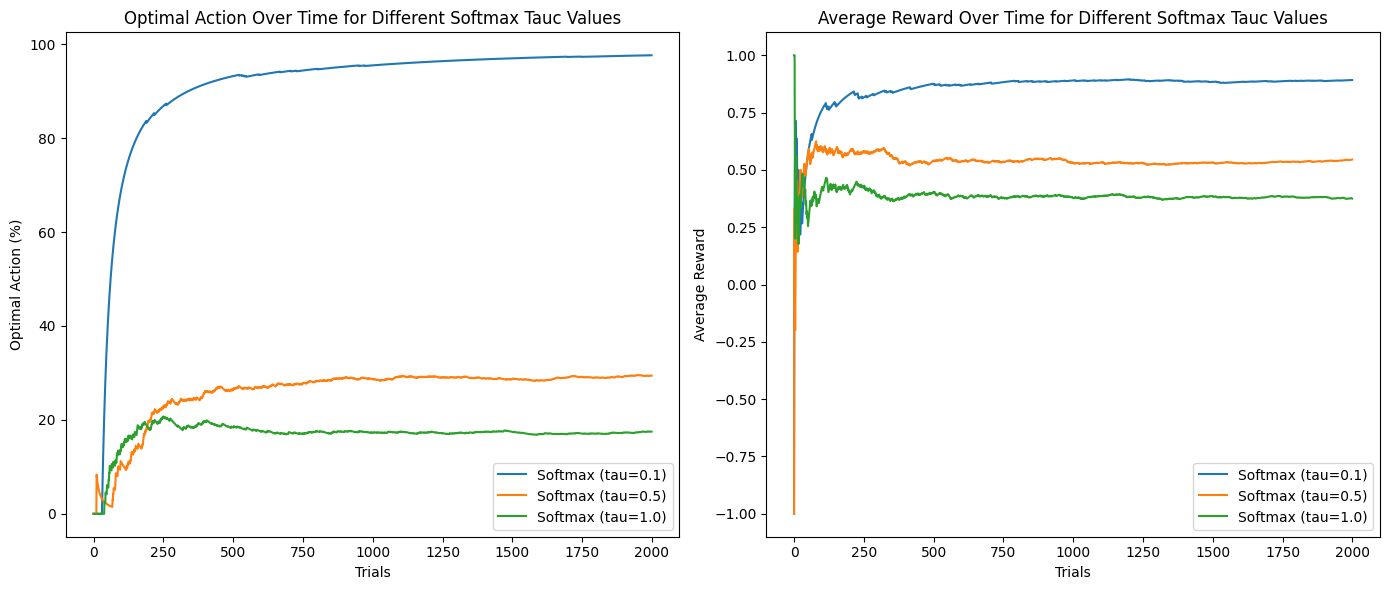

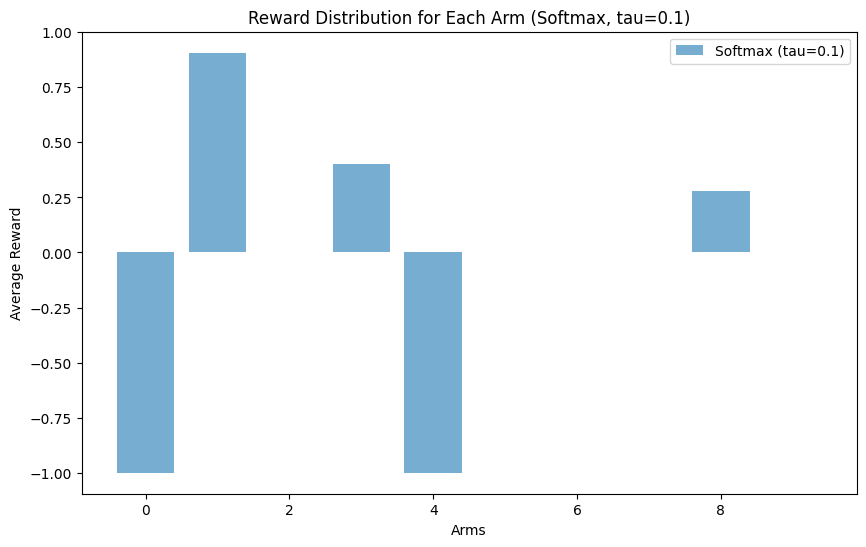

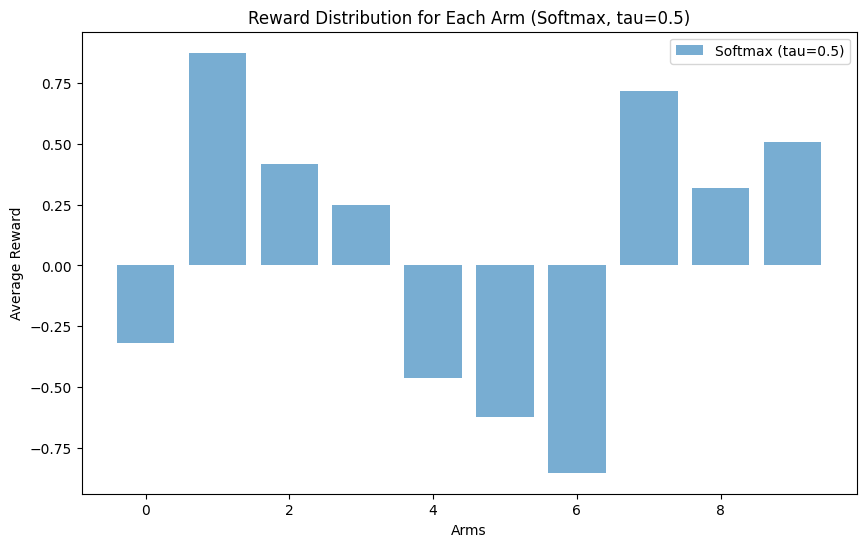

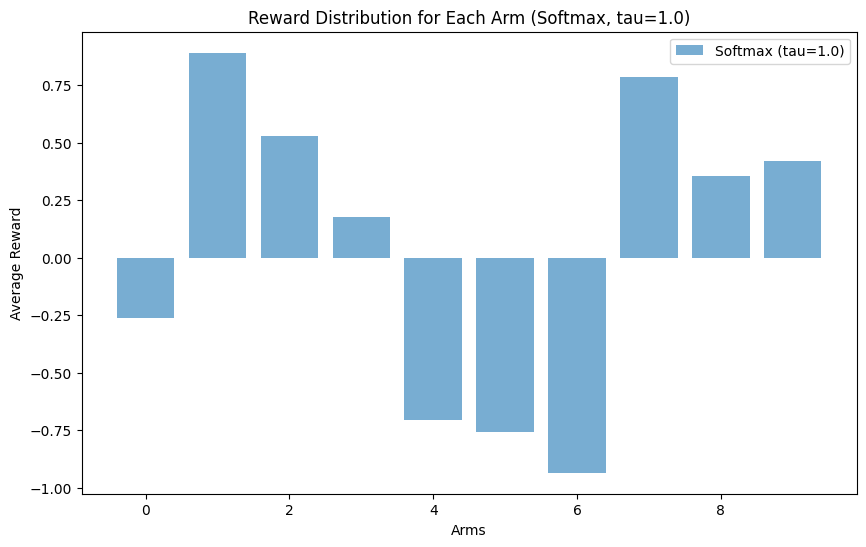

Average reward distribution for Softmax (tau=0.1):
Arm 0: -1.0000 average reward
Arm 1: 0.9068 average reward
Arm 2: 0.0000 average reward
Arm 3: 0.4000 average reward
Arm 4: -1.0000 average reward
Arm 5: 0.0000 average reward
Arm 6: 0.0000 average reward
Arm 7: 0.0000 average reward
Arm 8: 0.2800 average reward
Arm 9: 0.0000 average reward


Average reward distribution for Softmax (tau=0.5):
Arm 0: -0.3208 average reward
Arm 1: 0.8741 average reward
Arm 2: 0.4186 average reward
Arm 3: 0.2483 average reward
Arm 4: -0.4615 average reward
Arm 5: -0.6216 average reward
Arm 6: -0.8519 average reward
Arm 7: 0.7186 average reward
Arm 8: 0.3168 average reward
Arm 9: 0.5086 average reward


Average reward distribution for Softmax (tau=1.0):
Arm 0: -0.2605 average reward
Arm 1: 0.8914 average reward
Arm 2: 0.5273 average reward
Arm 3: 0.1765 average reward
Arm 4: -0.7045 average reward
Arm 5: -0.7568 average reward
Arm 6: -0.9344 average reward
Arm 7: 0.7855 average reward
Arm 8: 0.3534 average

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Setting random seed for reproducibility
np.random.seed(42)

# Parameter setting
n_arms = 10  # number of arms
n_trials = 2000  # number of trials
tau_values = [0.1, 0.5, 1.0]  # Different temperature parameters for Softmax

# Probabilities for each arm
true_probabilities = np.random.rand(n_arms)

# Print the true probabilities for each arm
print("True Probabilities for Each Arm:")
for arm in range(n_arms):
    print(f"Arm {arm}: {true_probabilities[arm]:.4f}")

optimal_arm = np.argmax(true_probabilities)  # arm with the highest probability

# Simulation for Softmax with different values of tau
results = {}

# Tracking reward distribution for each arm
average_reward_distribution = np.zeros((n_arms, len(tau_values)))

# Run simulation for each value of tau
for tau_idx, tau in enumerate(tau_values):
    # Initialize statistics for wins, trials per arm, and average rewards
    wins = np.zeros(n_arms)
    trials = np.zeros(n_arms)
    optimal_action_counts = np.zeros(n_trials)
    rewards = np.zeros(n_trials)

    total_reward = 0
    for t in range(1, n_trials + 1):
        # Softmax - select arm based on Softmax probabilities
        average_rewards = wins / (trials + 1e-10)  # Avoid division by zero
        exp_values = np.exp(average_rewards / tau)
        softmax_probs = exp_values / np.sum(exp_values)  # Normalize to get probabilities

        chosen_arm = np.random.choice(np.arange(n_arms), p=softmax_probs)

        # Get the reward for the chosen arm
        reward = 1 if np.random.rand() < true_probabilities[chosen_arm] else -1

        # Update statistics
        wins[chosen_arm] += reward
        trials[chosen_arm] += 1
        total_reward += reward

        # Store the rewards and optimal action
        rewards[t - 1] = total_reward
        if chosen_arm == optimal_arm:
            optimal_action_counts[t - 1] = 1  # Count as optimal action

    # Calculate the percentage of optimal actions and average rewards
    optimal_action_percentage = np.cumsum(optimal_action_counts) / (np.arange(1, n_trials + 1)) * 100
    average_rewards = rewards / (np.arange(1, n_trials + 1))

    # Save results for current tau
    results[f'Softmax_tau_{tau}'] = (optimal_action_percentage, average_rewards)

    # Calculate average reward distribution for each arm for current tau
    for arm in range(n_arms):
        if trials[arm] > 0:
            average_reward_distribution[arm, tau_idx] = wins[arm] / trials[arm]  # Calculate average reward

# Plotting results
plt.figure(figsize=(14, 6))

# Plot percentage of Optimal Actions
plt.subplot(1, 2, 1)
for tau in tau_values:
    plt.plot(results[f'Softmax_tau_{tau}'][0], label=f"Softmax (tau={tau})")
plt.xlabel("Trials")
plt.ylabel("Optimal Action (%)")
plt.title("Optimal Action Over Time for Different Softmax Tauc Values")
plt.legend()

# Plot average reward
plt.subplot(1, 2, 2)
for tau in tau_values:
    plt.plot(results[f'Softmax_tau_{tau}'][1], label=f"Softmax (tau={tau})")
plt.xlabel("Trials")
plt.ylabel("Average Reward")
plt.title("Average Reward Over Time for Different Softmax Tauc Values")
plt.legend()

plt.tight_layout()
plt.show()

# Plotting reward distribution for each arm for different tau values
for tau_idx, tau in enumerate(tau_values):
    plt.figure(figsize=(10, 6))
    plt.bar(np.arange(n_arms), average_reward_distribution[:, tau_idx], alpha=0.6, label=f"Softmax (tau={tau})")
    plt.xlabel("Arms")
    plt.ylabel("Average Reward")
    plt.title(f"Reward Distribution for Each Arm (Softmax, tau={tau})")
    plt.legend()
    plt.show()

# Display average reward distribution for each arm for each tau
for tau_idx, tau in enumerate(tau_values):
    print(f"Average reward distribution for Softmax (tau={tau}):")
    for arm in range(n_arms):
        print(f"Arm {arm}: {average_reward_distribution[arm, tau_idx]:.4f} average reward")
    print("\n")
